# Assignment 2
### by: Sharon Hendy - 209467158, Pan Eyal - 208722058

In this jupyter notebook we only show the results of the algorithms we wrote in the Blackjack.py file.  
We represent states as tuples of (player sum, dealer showing, usable ace).  
We added three special states that will be used as terminal states: WIN, LOSE, DRAW.  
First we will find the transition matrix and the reward function, then with the policy iteration algorithm, we will find the optimal policy.  
The policy iteration uses an initial policy that always hit if the player sum is less than 20 as specified in the assignment.  
Finally, we will run and plot the value averages changes for each iteration during learning and plot the starting policies for unusable ace case.  

In [1]:
from Blackjack import transition_matrix, reward_function, monte_carlo_policy_iteration, sarsa_policy_iteration, ALL_STATES, WIN, LOSE, DRAW

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

### Get transition matrix and reward function

The transition matrix function calculates the transition matrix for the blackjack game.  
The function gets a sample size and runs sample size blackjack games.  
If the sampled action results in termination, the transitioned state will be determined by the received reward (WIN, LOSE, DRAW).  
The function prints all non-zero transition probabilities with a 3 decimal accuracy and returns the transition matrix.  
For the sake of keeping the PDF clean, we will not print the transition matrix here.

In [2]:
tr_matrix = transition_matrix(sample_size=10 ** 5, should_print=False)

100%|██████████| 100000/100000 [00:09<00:00, 10151.25it/s]


The reward function returns the already known reward function for the blackjack game that is:  
-> for a terminating state s: R(s) = 1 for win, R(s) = -1 for lose, R(s) = 0 for draw.  
-> for a non-terminating state s: R(s) = 0.


In [3]:
r_s_a = reward_function()

### Create a specific policy that always hit if the player sum is less than 20

In [4]:
pi = dict()
for state in ALL_STATES:
    pi[state] = 1 if state[0] < 21 else 0
for state in [WIN, LOSE, DRAW]:
    pi[state] = 0

### Run policy iteration with deferent methods and plot value averages changes
First we run the monte-carlo first-visit and every-visit:
The monte-carlo policy iteration function gets a transition matrix, a reward function, a number of episodes to perform and an optional initial policy.
The function iterates between the monte-carlo policy evaluation and the policy improvement functions until the policy is stable or a limit is reached.
The function returns the optimal value function, the optimal policy and the specified states average value over first 20 iterations for plotting the desired graph.

In [5]:
v_1, pi_1, value_avg_1 = monte_carlo_policy_iteration(tr_matrix, r_s_a, pi=pi.copy(), episodes=1000, first_visit=True)

Policy iteration did not converge after 100 iterations.nter: 7, diff in pi: 9counter: 9, diff in pi: 5counter: 11, diff in pi: 9counter: 13, diff in pi: 8counter: 15, diff in pi: 4counter: 17, diff in pi: 5counter: 19, diff in pi: 11counter: 21, diff in pi: 5counter: 23, diff in pi: 6counter: 25, diff in pi: 5counter: 27, diff in pi: 14counter: 29, diff in pi: 7counter: 31, diff in pi: 5counter: 33, diff in pi: 5counter: 35, diff in pi: 5counter: 37, diff in pi: 7counter: 39, diff in pi: 2counter: 41, diff in pi: 9counter: 43, diff in pi: 6counter: 45, diff in pi: 4counter: 47, diff in pi: 5counter: 49, diff in pi: 7counter: 51, diff in pi: 5counter: 53, diff in pi: 5counter: 55, diff in pi: 4counter: 57, diff in pi: 10counter: 59, diff in pi: 9counter: 61, diff in pi: 7counter: 63, diff in pi: 12counter: 65, diff in pi: 9counter: 67, diff in pi: 9counter: 69, diff in pi: 11counter: 71, diff in pi: 6counter: 73, diff in pi: 4counter: 75, diff in pi: 8counter: 77, diff in pi: 9counter: 

In [6]:
v_2, pi_2, value_avg_2 = monte_carlo_policy_iteration(tr_matrix, r_s_a, pi=pi.copy(), episodes=1000, first_visit=False)

Policy iteration did not converge after 100 iterations.


In [7]:
v_3, pi_3, value_avg_3 = sarsa_policy_iteration(episodes=1000, alpha=0.1, gamma=1.0, epsilon=0.3)

Policy iteration converged after 1 iterations.


### Plot value averages changes
Here we plot the average value of the specified states over first 20 iterations.
We can see that during the run, the value average mostly increases with each iteration.

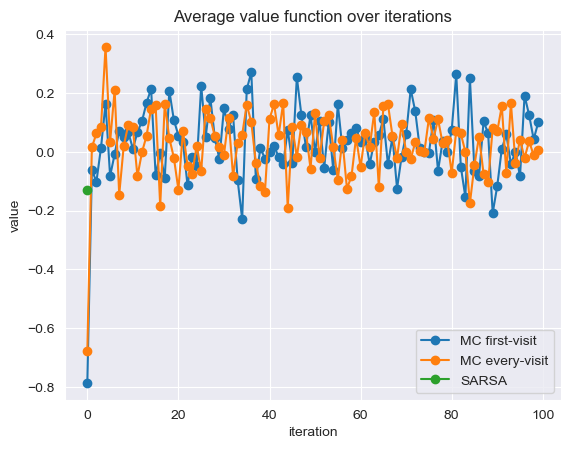

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(np.arange(len(value_avg_1)), value_avg_1, 'o-', label="MC first-visit")
plt.plot(np.arange(len(value_avg_2)), value_avg_2, 'o-', label="MC every-visit")
plt.plot(np.arange(len(value_avg_3)), value_avg_3, 'o-', label="SARSA")
plt.title("Average value function over iterations")
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()
plt.show()
plt.clf()

### Plot the starting policies for unusable ace
Here we plot the starting policies for unusable ace.

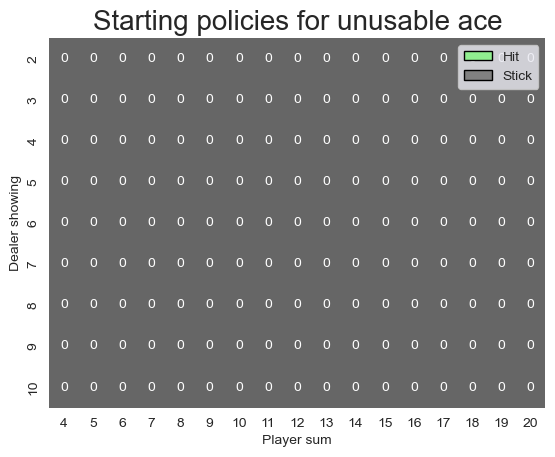

<Figure size 640x480 with 0 Axes>

In [10]:
player_count, dealer_count = np.meshgrid(
    # players count, dealers face-up card
    np.arange(4, 21),
    np.arange(2, 11),
)

# create the policy grid for plotting
pi_grid = np.apply_along_axis(
    lambda obs: pi_3[(obs[0], obs[1], 0)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)

# plot the policy for unusable ace
plt.figure()
sns.heatmap(pi_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False, xticklabels=range(4, 21), yticklabels=list(range(2, 11)))
plt.title("Starting policies for unusable ace", fontsize=20)
plt.xlabel("Player sum")
plt.ylabel("Dealer showing")

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
plt.legend(handles=legend_elements)
plt.show()
plt.clf()